In [45]:
import numpy as np
import h5py
import imageio
import matplotlib.pyplot as plt
di = h5py.File('faceimages.mat')

In [46]:
x = np.array(di["data"][:])

In [47]:
x = np.delete(x,10304,0)

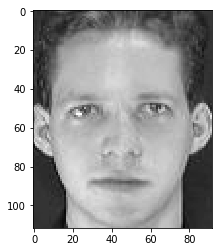

In [48]:
y = x.reshape((92,112,400))
first = y[:,:,0]
plt.imshow(first.T,cmap='gray')
plt.show()

In [49]:
x_mu = np.mean(x,axis=1,keepdims=True)
x_dash = x-x_mu
x_cov = np.cov(x_dash)
print(x_cov.shape)

(10304, 10304)


In [50]:
eigvals, eigvecs = np.linalg.eigh(x_cov)
print(eigvecs.shape)

(10304, 10304)


In [51]:
index = eigvals.argsort()[::-1]
eigvals = eigvals[index]
eigvecs = eigvecs[:,index]

In [52]:
A = eigvecs
Y = np.dot(A.T,xx_dash)
print(Y.shape)

(10304, 400)


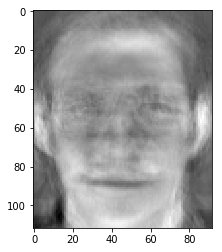

16.278413746551763


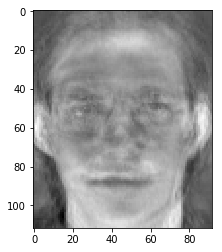

13.401450722126402


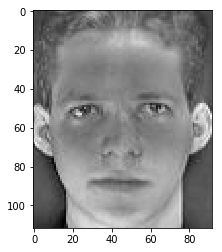

1.9486017605719927e-13


In [53]:
recX50 = np.dot(A[:,:50],Y[:50,0])
compres = recX50.reshape((92,112))
plt.imshow(compres.T,cmap='gray')
plt.show()
print(np.sqrt(np.sum(abs(recX50-x_dash[:,0])**2)/len(recX50)))

recX100 = np.dot(A[:,:100],Y[:100,0])
compres = recX100.reshape((92,112))
plt.imshow(compres.T,cmap='gray')
plt.show()
print(np.sqrt(np.sum(abs(recX100-x_dash[:,0])**2)/len(recX100)))

recX400 = np.dot(A[:,:400],Y[:400,0])
compres = recX400.reshape((92,112))
plt.imshow(compres.T,cmap='gray')
plt.show()
print(np.sqrt(np.sum(abs(recX400-x_dash[:,0])**2)/len(recX400)))